In [1]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time

import os
import csv
from scipy import stats
from config import api_key
from scipy.stats import linregress

from citipy import citipy


In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []



In [4]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


626

In [5]:
cities_df = pd.DataFrame({"Cities": cities})
cities_df.head()

,Cities
0,rikitea
1,kapaa
2,atar
3,emborion
4,port alfred


In [6]:

units = "Imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
# build query URL and request your results 

query_url = f"{url}units={units}&appid={api_key}"


In [7]:
#variable to hold my data from each city json pull
citydata = []


for city in cities:
    city_url = query_url + "&q=" + city
    #print(city)
    try:
        response = requests.get(city_url).json()
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        wind = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        print(country)
        citydata.append({"City":city, "Latitude": lat, "Longitude": lng, "Temperature": temp, "Humidity":humidity, 
                         "Cloud_Cover": clouds, "Wind": wind, "Country": country, "Date": date})
    except:
        print(f"city not found")
        pass
    
#print(f"The lat information received is: {lat}")


PF
US
MR
GR
ZA
PF
KI
AR
GB
AR
MU
US
TC
US
CL
CA
HK
US
city not found
TO
GL
ZA
CN
RU
US
AU
US
TH
city not found
IN
city not found
CN
city not found
AU
IN
BR
US
SE
RU
city not found
UG
IN
CN
AR
ID
US
JP
US
BW
ID
AR
AL
RU
AR
RU
NZ
city not found
TZ
AU
BR
IN
BR
BR
CA
US
NA
BR
BR
CA
ZA
city not found
TH
JP
GD
RU
PG
NZ
RU
SO
ZA
MV
AU
RU
AO
RE
ZA
MX
ZA
MU
MZ
NZ
TL
KZ
AU
RU
CA
city not found
BR
city not found
city not found
RU
LK
city not found
GH
US
PG
RU
EC
JP
AU
EC
PT
MX
BR
CA
CA
AU
US
GR
EG
VN
city not found
RU
RU
KZ
city not found
MU
city not found
US
RU
city not found
GL
RU
AU
DK
AU
MU
IQ
city not found
MX
SD
CA
PG
GF
NC
ZA
US
AU
RU
KZ
FR
IN
CN
US
US
US
PE
RU
GF
RU
ZW
US
RU
BB
MK
MX
EC
US
SR
NZ
PE
RU
US
UY
PG
AO
GB
UY
PW
BE
PE
AU
PT
GB
ID
city not found
RU
IN
CL
US
LY
GL
AU
CA
GB
PH
RU
BR
RU
RU
BR
RU
CN
US
NZ
RU
PT
IS
AU
VU
RU
city not found
PA
NO
ES
TW
RU
MY
US
VG
JP
PE
IN
PT
PT
RU
CN
BR
MN
US
PG
city not found
NO
NZ
TR
MV
CA
VN
RU
SO
PG
GA
ID
AU
IN
IS
BR
CL
AU
US
US
city not found
MZ
C

In [8]:
#DF with each requested element from including data for each city
city_df = pd.DataFrame(citydata)
city_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloud_Cover,Wind,Country,Date
0,rikitea,-23.12,-134.97,71.15,75,0,13.33,PF,1597532320
1,kapaa,22.08,-159.32,84.79,66,40,12.75,US,1597532320
2,atar,20.52,-13.05,101.48,21,73,6.69,MR,1597532320
3,emborion,40.48,21.55,66.20,93,3,1.12,GR,1597532320
4,port alfred,-33.59,26.89,52.45,67,98,21.03,ZA,1597532044


In [10]:
city_df.to_csv('city_file.csv')

<IPython.core.display.Javascript object>


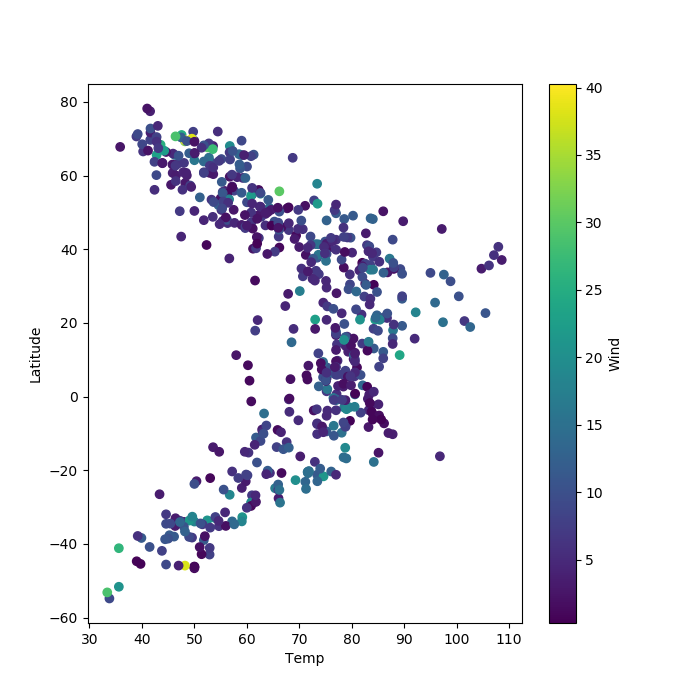

In [11]:
#Scatter plot comparing Latitude vs Temp with wind
plt.figure(figsize=(7,7))
plt.scatter(city_df['Temperature'],city_df['Latitude'],c=city_df['Wind'])
clb = plt.colorbar()
plt.xlabel("Temp")
plt.ylabel("Latitude")
clb.set_label("Wind")
plt.show()
# This graph shows temperature from Southern to Northern Hemishere.  As to be expected the highest temps are graphed 
# around the equator.  Also you can a grouping of high wind speeds around Lat 75% for this day which most likely indicates a storm.


<IPython.core.display.Javascript object>


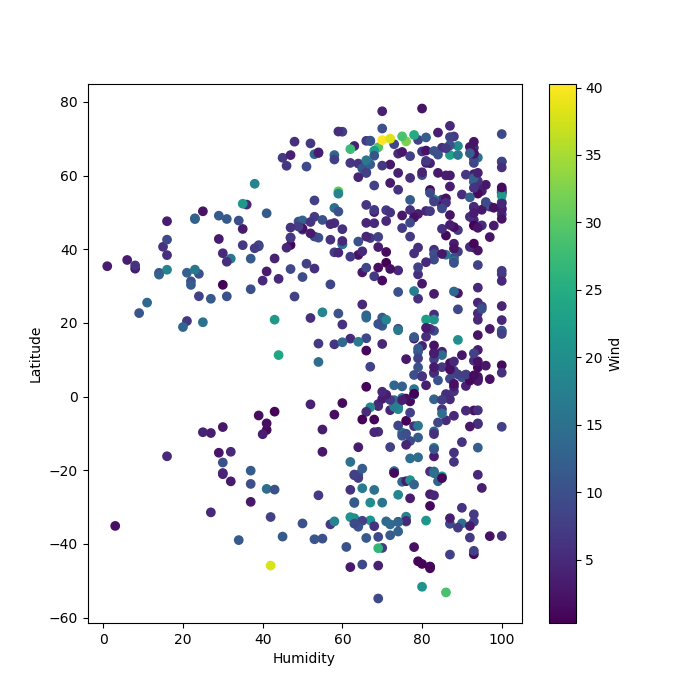

In [12]:
#Scatter plot 
plt.figure(figsize=(7,7))
plt.scatter(city_df['Humidity'],city_df['Latitude'],c=city_df['Wind'])
clb = plt.colorbar()
plt.xlabel("Humidity")
plt.ylabel("Latitude")
clb.set_label("Wind")
plt.show()
# This plot compares humidity with latitude. Overall it seems the planet in general is more humid than not on this day 
# but not much direct coorilation to latitude.


<IPython.core.display.Javascript object>


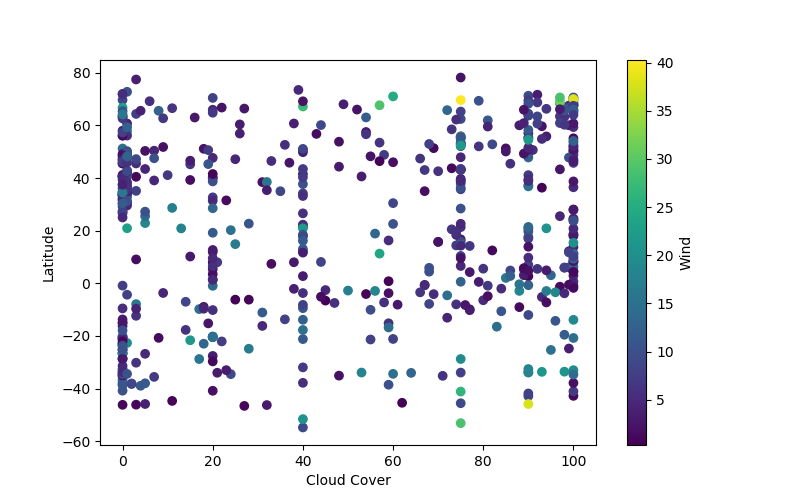

In [13]:
#Scatter plot 
plt.figure(figsize=(8,5))
plt.scatter(city_df['Cloud_Cover'],city_df['Latitude'],c=city_df['Wind'])
clb = plt.colorbar()
plt.xlabel("Cloud Cover")
plt.ylabel("Latitude")
clb.set_label("Wind")
plt.show()
# This plot compares Cloud cover % to Latitude. I don't see any trend with latitude and cloudiness

<IPython.core.display.Javascript object>


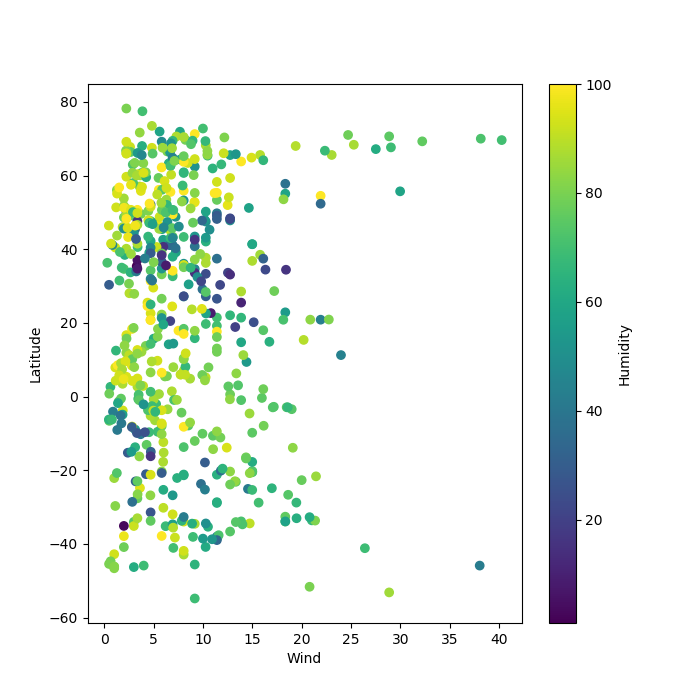

In [14]:
#Scatter plot 
plt.figure(figsize=(7,7))
plt.scatter(city_df['Wind'],city_df['Latitude'],c=city_df['Humidity'])
clb = plt.colorbar()
plt.xlabel("Wind")
plt.ylabel("Latitude")
clb.set_label("Humidity")
plt.show()

#This graph compares Latitude with Wind speed (MPH).  At about +75 deg N. Latitude there appears to be a storm
#causing very high wind speeds


In [15]:
#Northern Lat Dataframe
North_df = city_df[city_df['Latitude'] >= 0]
North_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloud_Cover,Wind,Country,Date
1,kapaa,22.08,-159.32,84.79,66,40,12.75,US,1597532320
2,atar,20.52,-13.05,101.48,21,73,6.69,MR,1597532320
3,emborion,40.48,21.55,66.20,93,3,1.12,GR,1597532320
6,butaritari,3.07,172.79,82.08,73,95,13.56,KI,1597532321
8,livingston,55.90,-3.52,57.56,100,75,8.05,GB,1597532321


In [16]:
# variables for Northern Hemisphere plots

Temp = North_df.Temperature
Latitude = North_df.Latitude
Wind = North_df.Wind
humidity = North_df.Humidity
cloudiness = North_df.Cloud_Cover
Wind = North_df.Wind



<IPython.core.display.Javascript object>


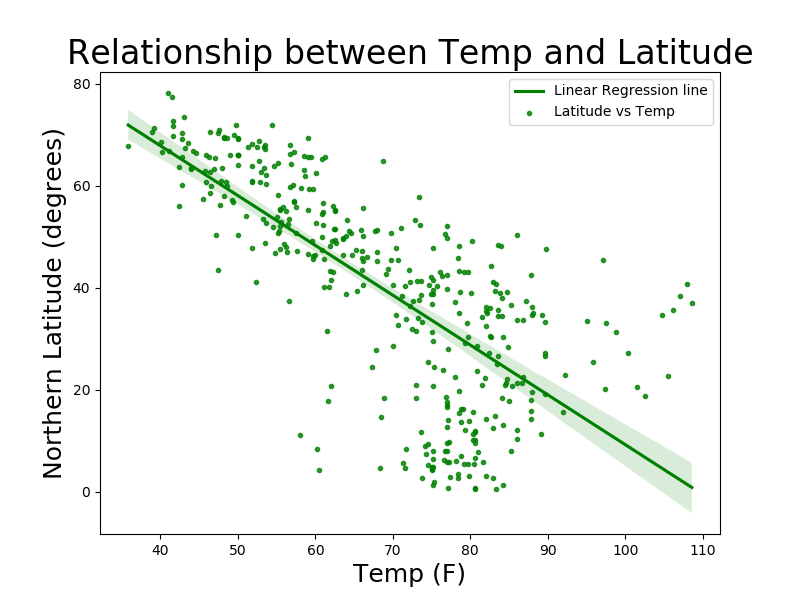

Text(0, 0.5, 'Northern Latitude (degrees)')

In [17]:
# Northern Hem regression plot using seaborn 

fig = plt.figure(figsize=(8, 6))
sns.regplot(x=Temp, y=Latitude, color='green', marker='.')


# Legend, title and labels.
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])
plt.title('Relationship between Temp and Latitude', size=24)
plt.xlabel('Temp (F)', size=18)
plt.ylabel('Northern Latitude (degrees)', size=18)

<IPython.core.display.Javascript object>


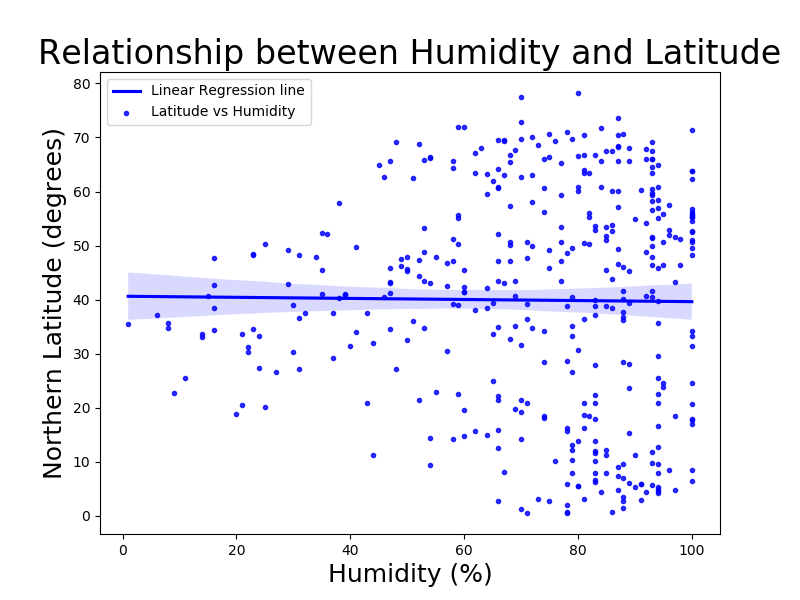

Text(0, 0.5, 'Northern Latitude (degrees)')

In [18]:
# Northern Hem regression plot using seaborn 

fig = plt.figure(figsize=(8, 6))
sns.regplot(x=humidity, y=Latitude, color='blue', marker='.')


# Legend, title and labels.
plt.legend(labels=['Linear Regression line', 'Latitude vs Humidity'])
plt.title('Relationship between Humidity and Latitude', size=24)
plt.xlabel('Humidity (%)', size=18)
plt.ylabel('Northern Latitude (degrees)', size=18)

<IPython.core.display.Javascript object>


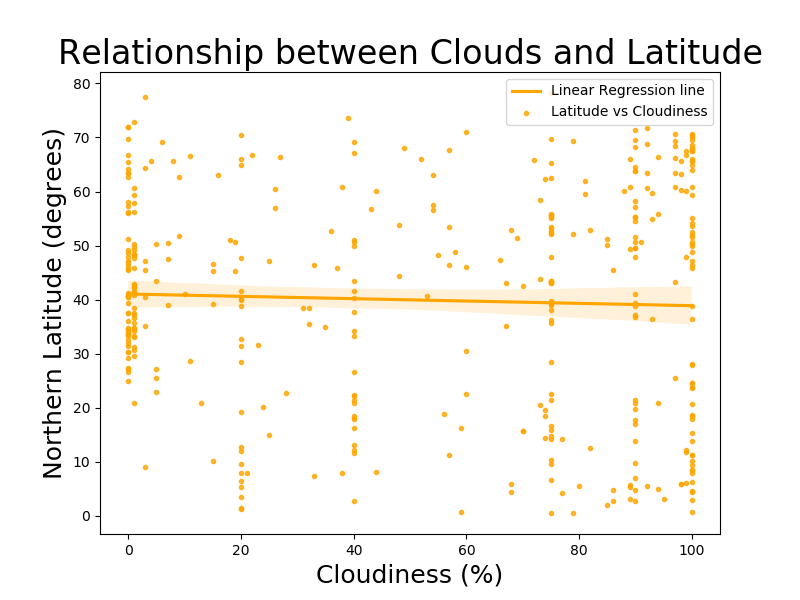

Text(0, 0.5, 'Northern Latitude (degrees)')

In [19]:
# Northern Hem regression plot using seaborn 

fig = plt.figure(figsize=(8, 6))
sns.regplot(x=cloudiness, y=Latitude, color='orange', marker='.')


# Legend, title and labels.
plt.legend(labels=['Linear Regression line', 'Latitude vs Cloudiness'])
plt.title('Relationship between Clouds and Latitude', size=24)
plt.xlabel('Cloudiness (%)', size=18)
plt.ylabel('Northern Latitude (degrees)', size=18)

<IPython.core.display.Javascript object>


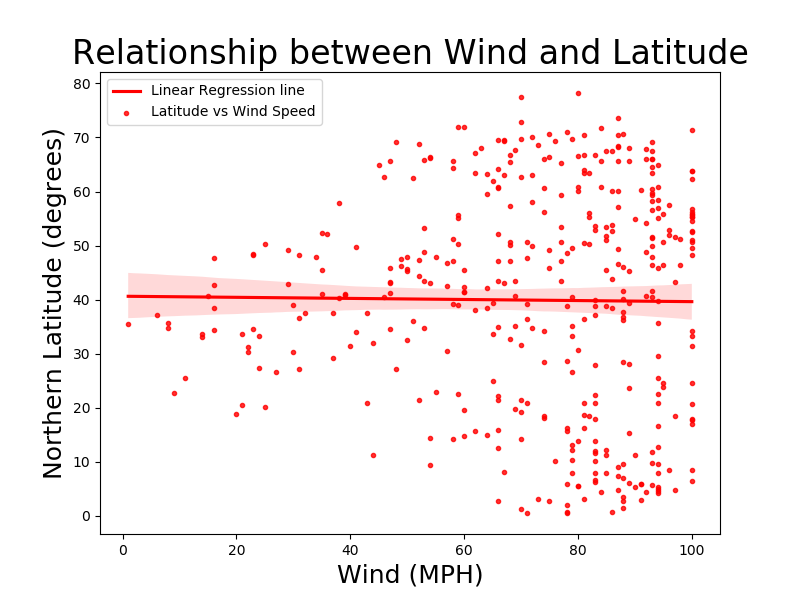

Text(0, 0.5, 'Northern Latitude (degrees)')

In [20]:
# Northern Hem regression plot using seaborn 

fig = plt.figure(figsize=(8, 6))
sns.regplot(x=humidity, y=Latitude, color='red', marker='.')

# Legend, title and labels.
plt.legend(labels=['Linear Regression line', 'Latitude vs Wind Speed'])
plt.title('Relationship between Wind and Latitude', size=24)
plt.xlabel('Wind (MPH)', size=18)
plt.ylabel('Northern Latitude (degrees)', size=18)

In [21]:
#Southern Lat Dataframe
South_df = city_df[city_df['Latitude'] <= 0]
South_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloud_Cover,Wind,Country,Date
0,rikitea,-23.12,-134.97,71.15,75,0,13.33,PF,1597532320
4,port alfred,-33.59,26.89,52.45,67,98,21.03,ZA,1597532044
5,atuona,-9.80,-139.03,78.08,75,17,14.99,PF,1597532321
7,mar del plata,-38.00,-57.56,46.13,45,5,11.41,AR,1597532105
9,ushuaia,-54.80,-68.30,33.80,69,40,9.17,AR,1597532120


In [22]:
# variables for Southern Hemisphere plots
STemp = South_df.Temperature
SLatitude = South_df.Latitude
SWind = South_df.Wind
Shumidity = South_df.Humidity
Scloudiness = South_df.Cloud_Cover
SWind = South_df.Wind

<IPython.core.display.Javascript object>


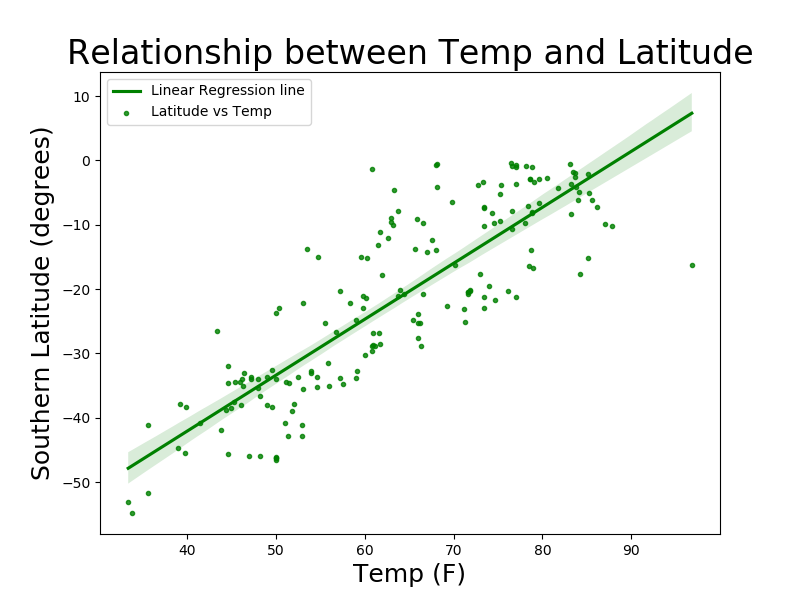

Text(0, 0.5, 'Southern Latitude (degrees)')

In [23]:
# Southern Hem regression plot using seaborn 

fig = plt.figure(figsize=(8, 6))
sns.regplot(x=STemp, y=SLatitude, color='green', marker='.')


# Legend, title and labels.
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])
plt.title('Relationship between Temp and Latitude', size=24)
plt.xlabel('Temp (F)', size=18)
plt.ylabel('Southern Latitude (degrees)', size=18)

<IPython.core.display.Javascript object>


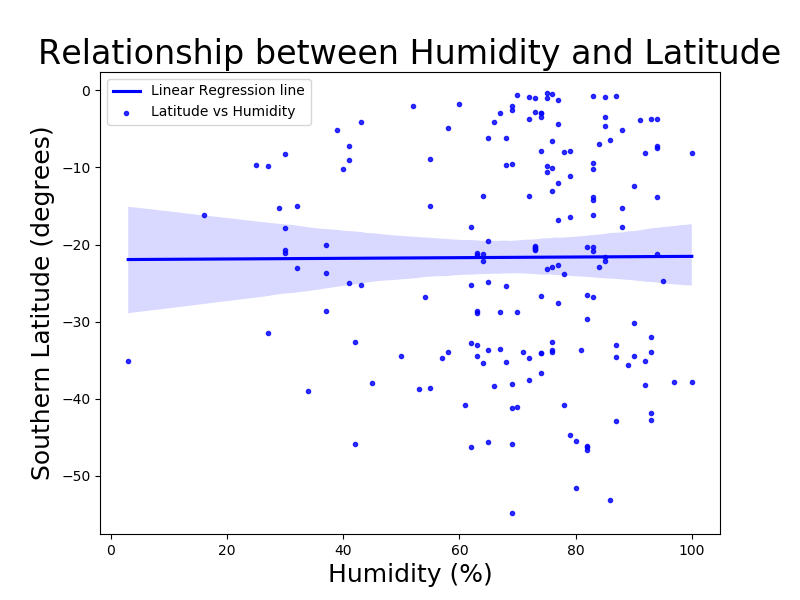

Text(0, 0.5, 'Southern Latitude (degrees)')

In [24]:
# Southern Hem regression plot using seaborn 

fig = plt.figure(figsize=(8, 6))
sns.regplot(x=Shumidity, y=SLatitude, color='blue', marker='.')


# Legend, title and labels.
plt.legend(labels=['Linear Regression line', 'Latitude vs Humidity'])
plt.title('Relationship between Humidity and Latitude', size=24)
plt.xlabel('Humidity (%)', size=18)
plt.ylabel('Southern Latitude (degrees)', size=18)

<IPython.core.display.Javascript object>


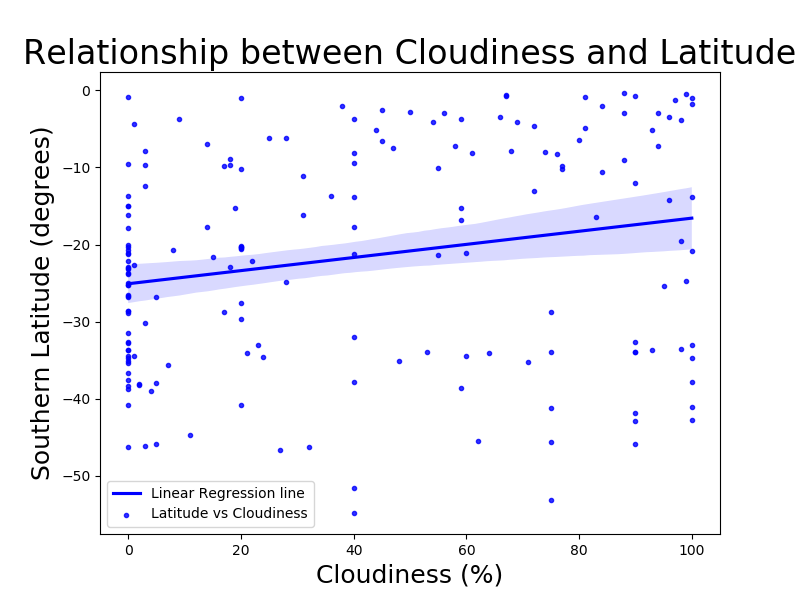

Text(0, 0.5, 'Southern Latitude (degrees)')

In [25]:
# Southern Hem regression plot using seaborn 

fig = plt.figure(figsize=(8, 6))
sns.regplot(x=Scloudiness, y=SLatitude, color='blue', marker='.')


# Legend, title and labels.
plt.legend(labels=['Linear Regression line', 'Latitude vs Cloudiness'])
plt.title('Relationship between Cloudiness and Latitude', size=24)
plt.xlabel('Cloudiness (%)', size=18)
plt.ylabel('Southern Latitude (degrees)', size=18)

<IPython.core.display.Javascript object>


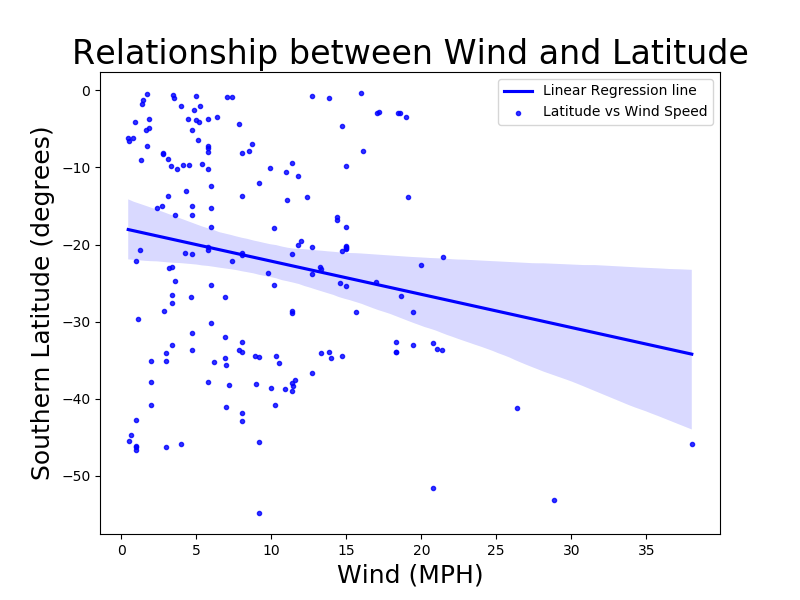

Text(0, 0.5, 'Southern Latitude (degrees)')

In [26]:
# Southern Hem regression plot using seaborn 

fig = plt.figure(figsize=(8, 6))
sns.regplot(x=SWind, y=SLatitude, color='blue', marker='.')


# Legend, title and labels.
plt.legend(labels=['Linear Regression line', 'Latitude vs Wind Speed'])
plt.title('Relationship between Wind and Latitude', size=24)
plt.xlabel('Wind (MPH)', size=18)
plt.ylabel('Southern Latitude (degrees)', size=18)